In [1]:
#data analysis and data preparation
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_data.csv')

# Drop irrelevant columns
df.drop(['Car id', 'Customer Name', 'Dealer No', 'Phone'], axis=1, inplace=True)

# Drop missing values 
df.dropna(inplace=True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Body Style     23906 non-null  object
 11  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.2+ MB


,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...
23901,12/31/2023,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23902,12/31/2023,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23903,12/31/2023,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23904,12/31/2023,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin


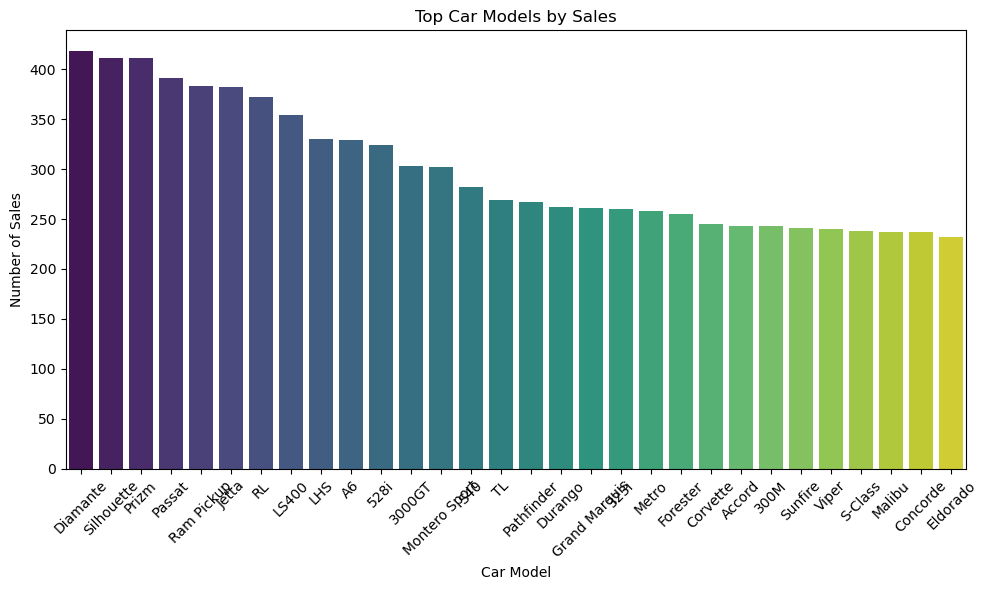

In [2]:
# Sales distribution by model
model_sales = df['Model'].value_counts()

# Make threashold so it is readable
threshold = 30

# Group less frequent models into 'Other' category
top_models = model_sales.head(threshold)
other_models_count = model_sales.iloc[threshold:].sum()
#top_models['All Other'] = other_models_count

# Visualization top 30 models
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

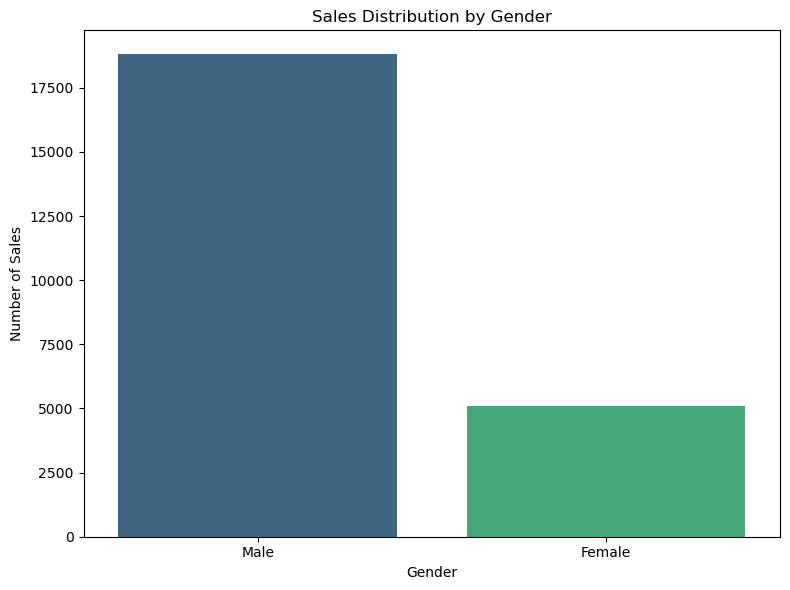

In [3]:
# Sales distribution by gender
gender_sales = df['Gender'].value_counts()

# Visualization of sales by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='viridis')
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

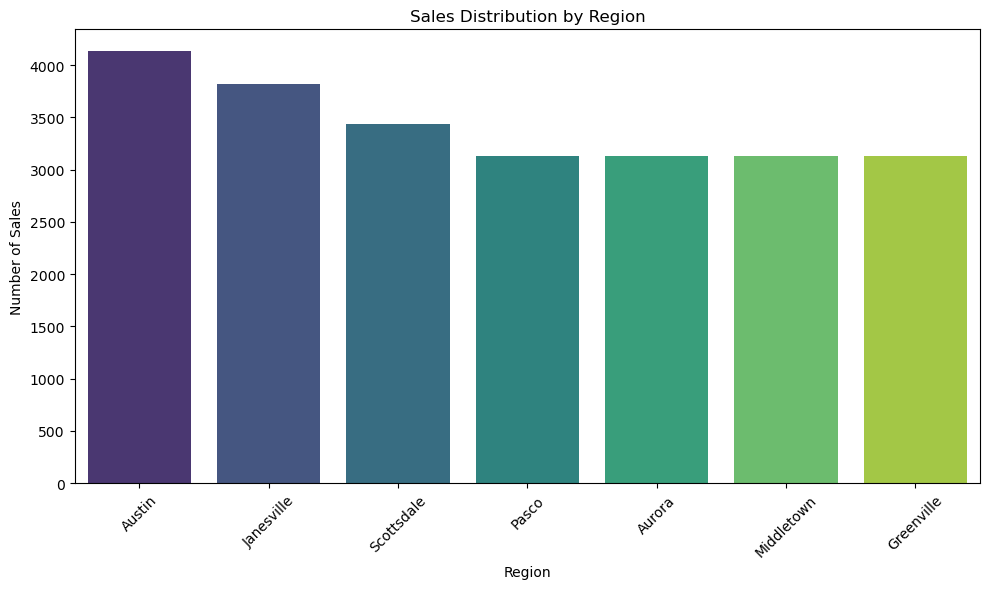

In [4]:
# Sales distribution by region
region_sales = df['Dealer_Region'].value_counts()

# Visualization of sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='viridis')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

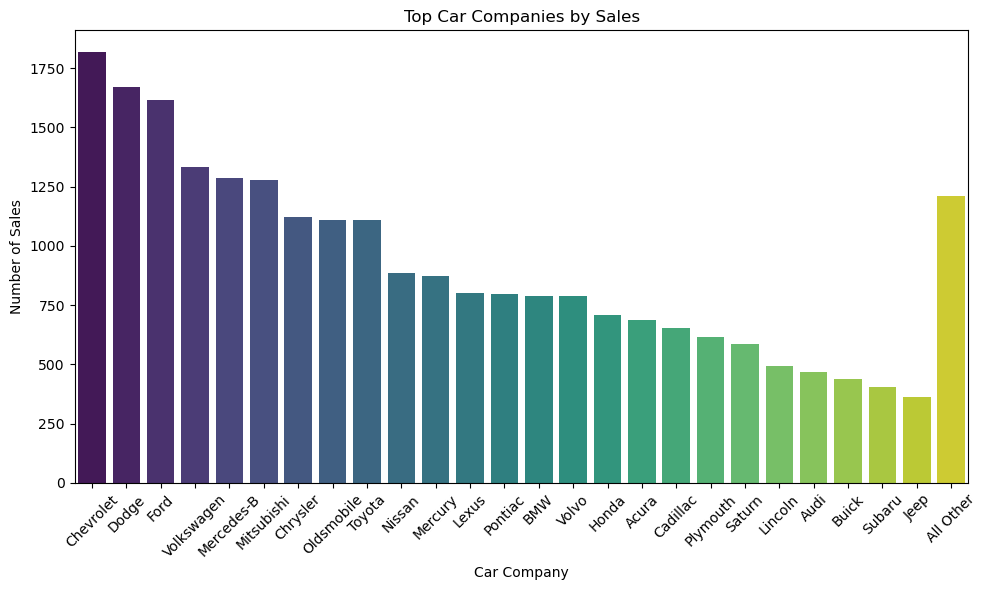

In [5]:
#plot best preforming companies
company_sales = df['Company'].value_counts()

# Setting threshold
threshold = 25

# Group less frequent companies into 'Other' category
top_companies = company_sales.head(threshold)
other_companies_count = company_sales.iloc[threshold:].sum()
top_companies['All Other'] = other_companies_count

# Visualization for Top N companies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values, palette='viridis')
plt.title('Top Car Companies by Sales')
plt.xlabel('Car Company')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

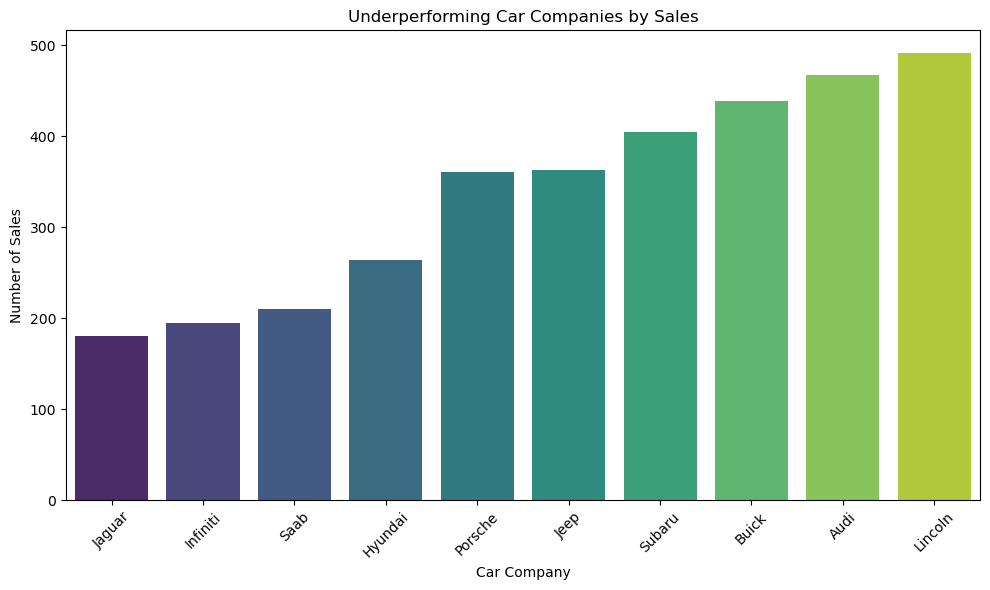

In [6]:
#NEXT PLOTS ARE FOR UNDERPREFORMING DATA
#Company
# Invert previous data set
underperforming_companies = company_sales[::-1]

# Determine threshold for underperforming companies
threshold_underperforming = 10

# Select underperforming companies
underperforming_companies = underperforming_companies.head(threshold_underperforming)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_companies.index, y=underperforming_companies.values, palette='viridis')
plt.title('Underperforming Car Companies by Sales')
plt.xlabel('Car Company')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

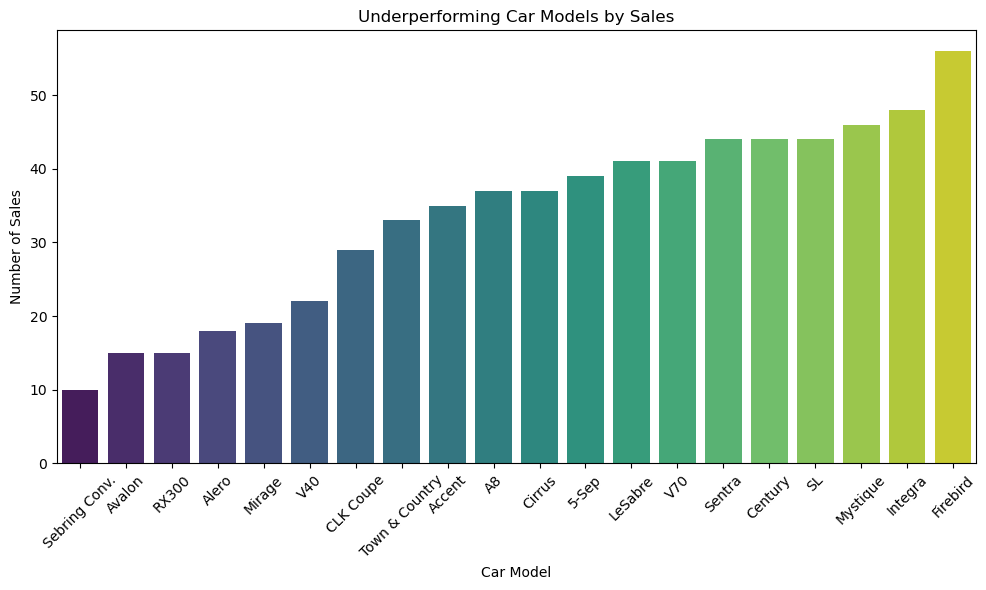

In [7]:
#Models
# Invert 
underperforming_models = model_sales[::-1]

# Determine threshold for underperforming models
threshold_underperforming = 20

# Select underperforming models
underperforming_models = underperforming_models.head(threshold_underperforming)

# Visualization for Underperforming models
plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_models.index, y=underperforming_models.values, palette='viridis')
plt.title('Underperforming Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

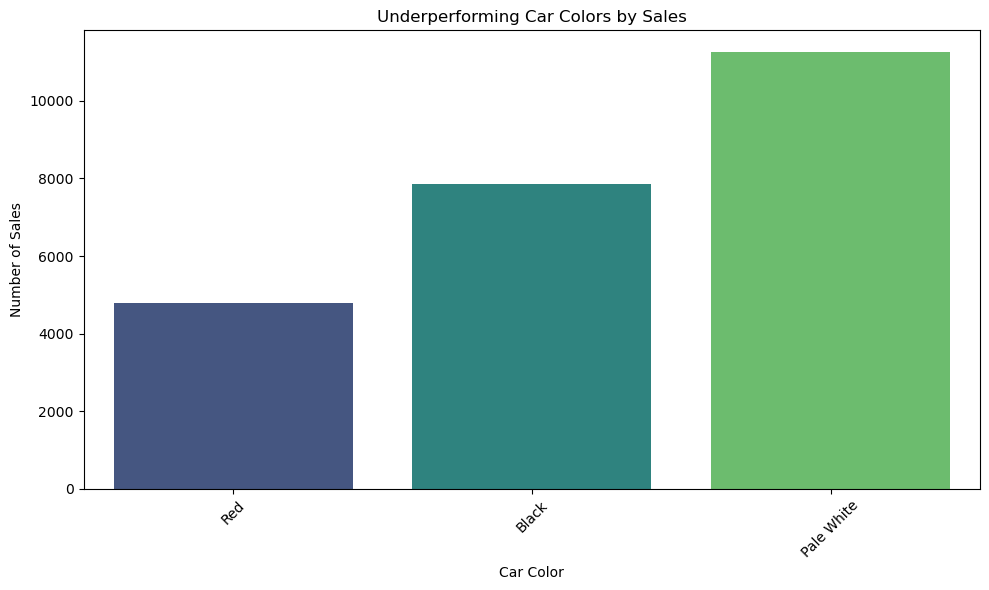

In [8]:
#color
# Sales distribution by color
color_sales = df['Color'].value_counts()

# Invert ^^^^
underperforming_colors = color_sales[::-1]

# Determine threshold for underperforming colors
threshold_underperforming = 10 

# Select underperforming colors
underperforming_colors = underperforming_colors.head(threshold_underperforming)

# Visualization 
plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_colors.index, y=underperforming_colors.values, palette='viridis')
plt.title('Underperforming Car Colors by Sales')
plt.xlabel('Car Color')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#trash and fake data set only has 3 colors xd

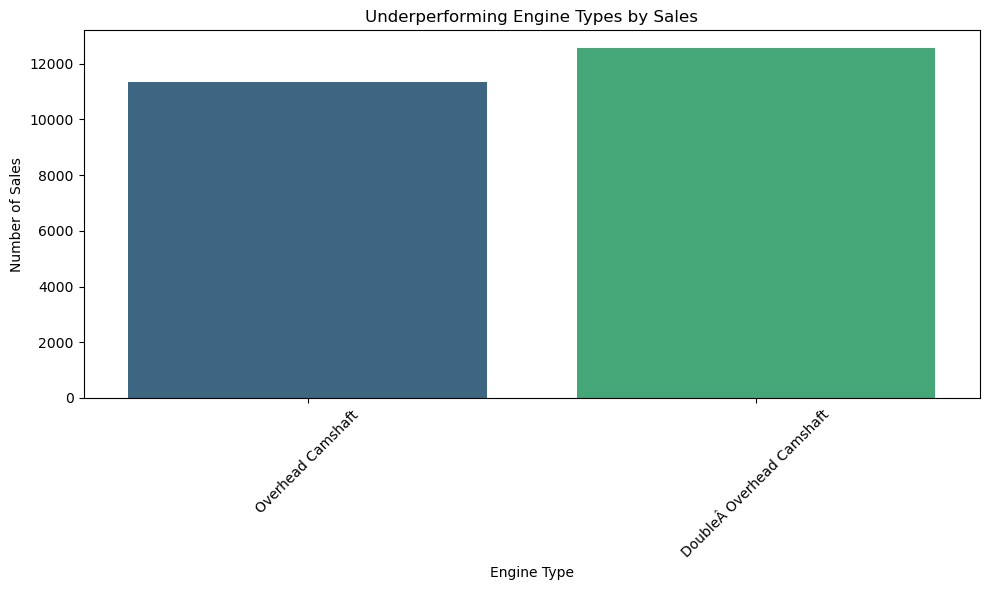

In [9]:
#engine
# Sales distribution by engine
engine_sales = df['Engine'].value_counts()

# Invert
underperforming_engines = engine_sales[::-1]

# Determine threshold for underperforming engine types
threshold_underperforming = 5  

# Select underperforming engine types
underperforming_engines = underperforming_engines.head(threshold_underperforming)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_engines.index, y=underperforming_engines.values, palette='viridis')
plt.title('Underperforming Engine Types by Sales')
plt.xlabel('Engine Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#fake data set only has 2 engine parts

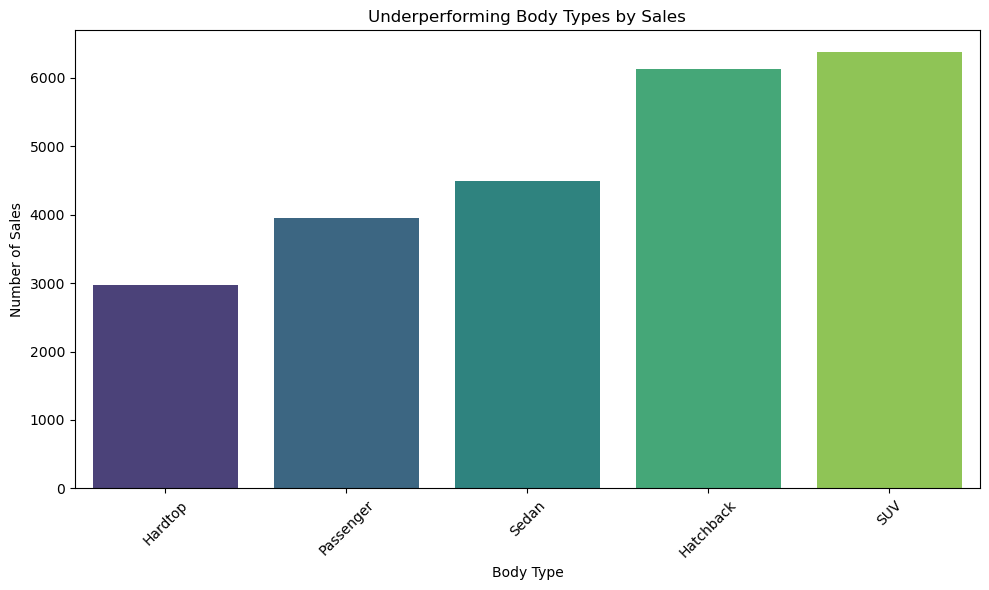

In [10]:
# Sales distribution by body type
body_sales = df['Body Style'].value_counts()

# Invert 
underperforming_body = body_sales[::-1]

# Determine threshold for underperforming body types
threshold_underperforming = 10

# Select underperforming body types
underperforming_body = underperforming_body.head(threshold_underperforming)

# Visualization 
plt.figure(figsize=(10, 6))
sns.barplot(x=underperforming_body.index, y=underperforming_body.values, palette='viridis')
plt.title('Underperforming Body Types by Sales')
plt.xlabel('Body Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

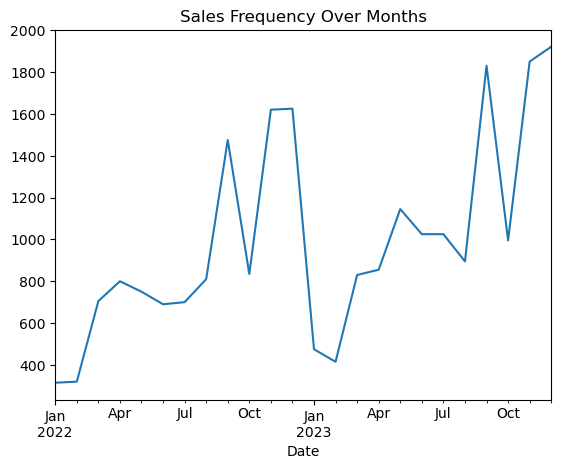

In [11]:
# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales data by month
df_aggregated = df.groupby(df['Date'].dt.to_period('M')).size()

# Set the frequency of the time series to monthly
df_aggregated = df_aggregated.asfreq('M')

# Visualizing the Sales Frequency
df_aggregated.plot(title='Sales Frequency Over Months')
plt.show()

In [12]:
#coloration with gender and car purchase
#I will train it to use decision trees to predict the gender of customer based on the collumns we are given in the data set


#new data set
male_df = df

print('Male dataset shape:', male_df.shape)


Male dataset shape: (23906, 12)


In [13]:
#convert price <50k and >50k
male_df.drop(['Date'], axis=1, inplace=True)
male_df['Price ($)'] = (male_df['Price ($)'] > 50000).astype(int)
#convert annual income >100k <100k
male_df['Annual Income'] = (male_df['Annual Income'] > 100000).astype(int)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in male_df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
#drop date and dealer_name
#male_df.drop(['Date'], axis=1, inplace=True)
male_df

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1,0,0,8,60,0,0,0,0,3,4
1,1,1,1,7,52,0,0,0,0,3,0
2,1,1,2,4,57,1,1,2,0,2,2
3,1,0,4,27,36,1,1,1,0,3,5
4,1,1,3,0,141,0,0,2,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
23901,1,0,1,21,150,1,1,2,0,2,5
23902,0,1,21,5,109,0,0,0,0,0,4
23903,1,1,4,2,4,1,1,2,0,4,6
23904,1,0,3,5,93,0,0,0,0,2,1


In [14]:
#male_df

#decision trees
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Features 
X = male_df.drop(columns=['Gender']).values

# Target variable
y = male_df['Gender'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6601840234211627


In [15]:
#It can predict with an accuracy of 66%